<a href="https://colab.research.google.com/github/Sumeet9304/AI-HDP/blob/main/AI_HDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [13]:
# Load the dataset
file_path = "HDPcleve.csv"
data = pd.read_csv(file_path)

In [14]:
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   0       145   233    1        2      150      0      2.3      2   
1   67    1   3       160   286    0        2      108      1      1.5      1   
2   67    1   3       120   229    0        2      129      1      2.6      1   
3   37    1   2       130   250    0        0      187      0      3.5      2   
4   41    0   1       130   204    0        2      172      0      1.4      0   

   ca  thal  target  
0   0     2       0  
1   3     1       1  
2   2     3       1  
3   0     1       0  
4   0     1       0  


In [15]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    2.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.990099  149.607261    0.326733    1.039604    0.600660    0.663366   
std   

In [16]:
print("\nCorrelation Matrix:")
corr_matrix = data.corr()
print(corr_matrix)


Correlation Matrix:
               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.097542  0.104139  0.284946  0.208950  0.118530   
sex      -0.097542  1.000000  0.010084 -0.064456 -0.199915  0.047862   
cp        0.104139  0.010084  1.000000 -0.036077  0.072319 -0.039975   
trestbps  0.284946 -0.064456 -0.036077  1.000000  0.130120  0.175340   
chol      0.208950 -0.199915  0.072319  0.130120  1.000000  0.009841   
fbs       0.118530  0.047862 -0.039975  0.175340  0.009841  1.000000   
restecg   0.148868  0.021647  0.067505  0.146560  0.171043  0.069564   
thalach  -0.393806 -0.048663 -0.334422 -0.045351 -0.003432 -0.007854   
exang     0.091661  0.146201  0.384060  0.064762  0.061310  0.025665   
oldpeak   0.203805  0.102173  0.202277  0.189171  0.046564  0.005747   
slope     0.161770  0.037533  0.152050  0.117382 -0.004062  0.059894   
ca        0.365323  0.086048  0.233117  0.097528  0.123726  0.140764   
thal      0.122300  0.367911  0.259835  0.1

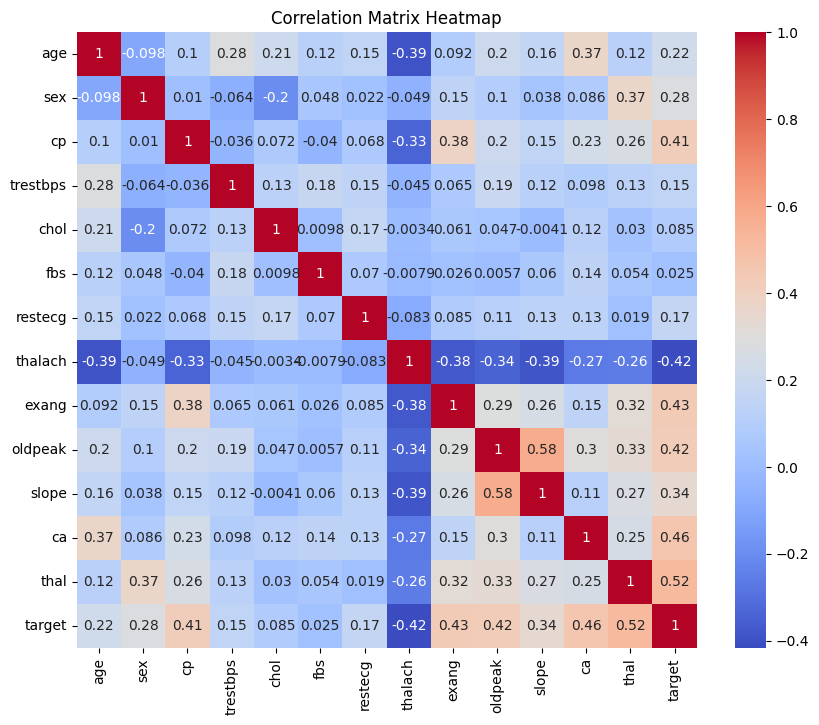

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

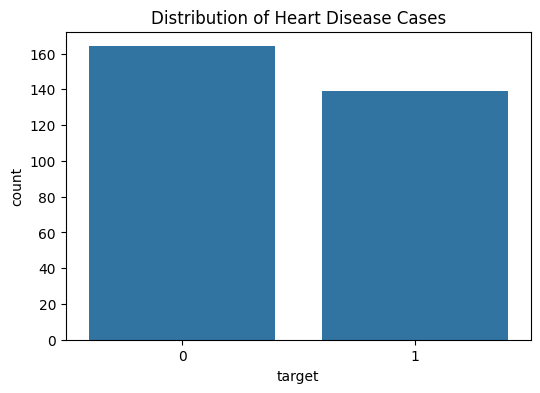

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=data)
plt.title("Distribution of Heart Disease Cases")
plt.show()

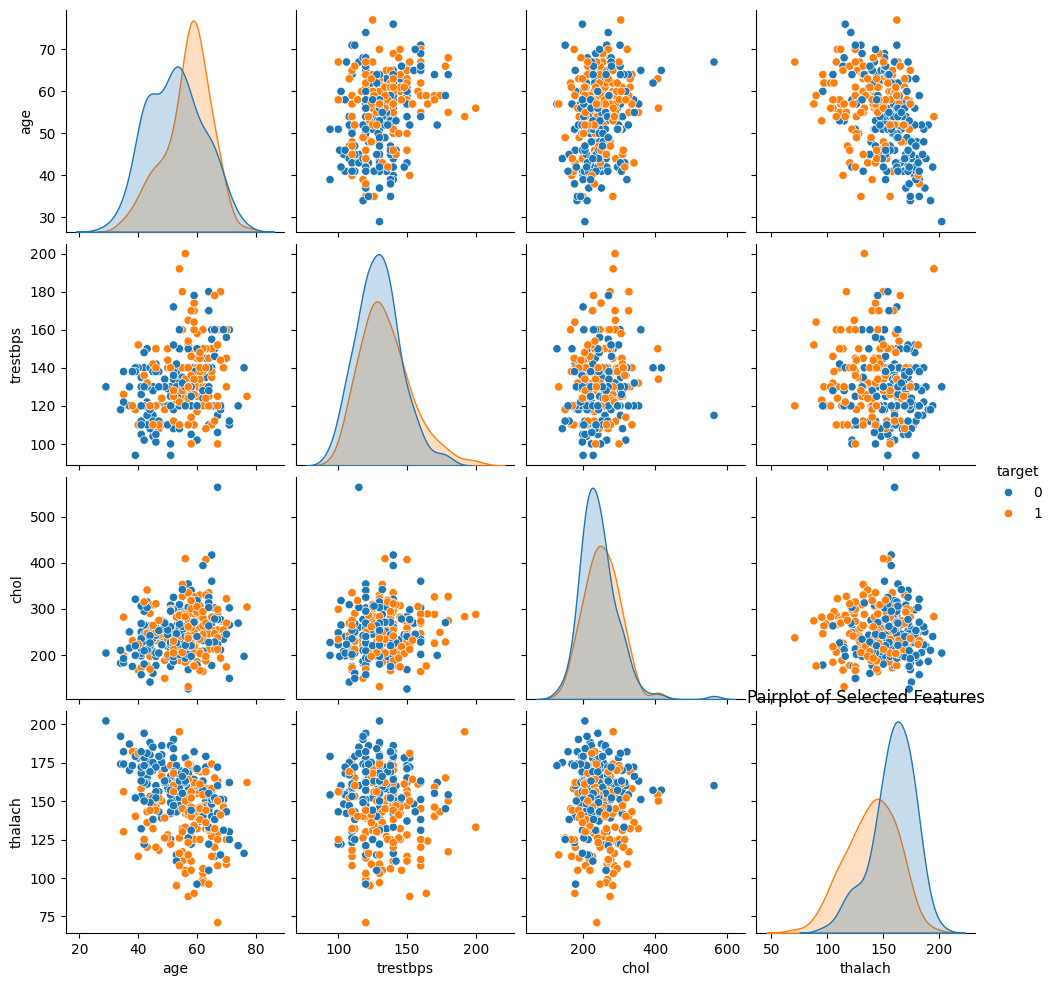

In [19]:
sns.pairplot(data[['age', 'trestbps', 'chol', 'thalach', 'target']], hue='target')
plt.title("Pairplot of Selected Features")
plt.show()

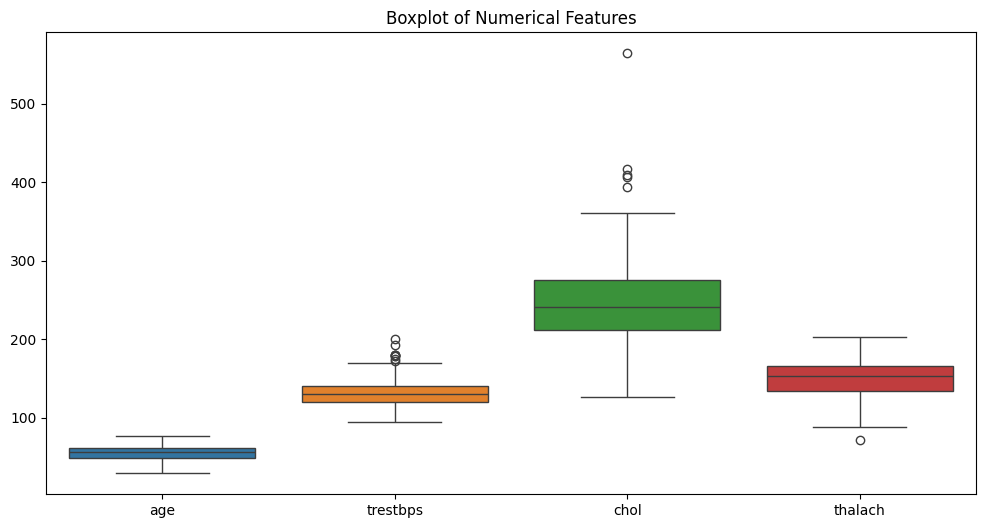

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['age', 'trestbps', 'chol', 'thalach']])
plt.title("Boxplot of Numerical Features")
plt.show()

In [21]:
print("Input Dataset:")
print(data)

Input Dataset:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   0       145   233    1        2      150      0      2.3   
1     67    1   3       160   286    0        2      108      1      1.5   
2     67    1   3       120   229    0        2      129      1      2.6   
3     37    1   2       130   250    0        0      187      0      3.5   
4     41    0   1       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   0       110   264    0        0      132      0      1.2   
299   68    1   3       144   193    1        0      141      0      3.4   
300   57    1   3       130   131    0        0      115      1      1.2   
301   57    0   1       130   236    0        2      174      0      0.0   
302   38    1   2       138   175    0        0      173      0      0.0   

     slope  ca  thal  target  
0        2   0     2       0  
1        1

In [22]:
# Separating features and target variable
X = data.drop(columns=['target'])  # Features
y = data['target']

In [23]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

In [24]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [25]:
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV to find the best model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [26]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.8305272108843538


In [27]:
# Train the model
best_clf = grid_search.best_estimator_

# Predict on the test set
y_pred = best_clf.predict(X_test)

In [28]:
# Print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

def predict_heart_disease(input_data,model):
    input_df = pd.DataFrame([input_data], columns=X.columns)
    prediction = model.predict(input_df)
    return "Heart Disease" if prediction[0] == 1 else "No Heart Disease"

Model Accuracy: 88.52%

Confusion Matrix:
[[27  2]
 [ 5 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



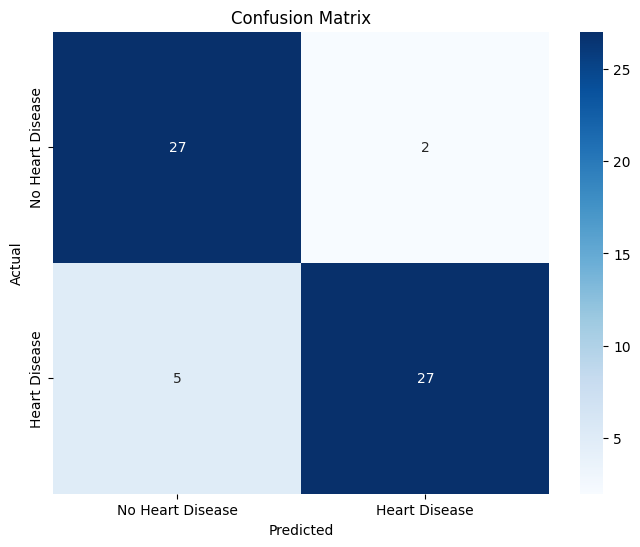

In [29]:
def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Heart Disease', 'Heart Disease'],
                yticklabels=['No Heart Disease', 'Heart Disease'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


plot_confusion_matrix(cm)

In [51]:
# Example: Select the first test patient
test_data = X_test.iloc[31]  # Selecting the first test patient

In [48]:
# Print the selected test patient's data
print("Selected Test Patient's Data:")
print(test_data)

Selected Test Patient's Data:
age          56.0
sex           1.0
cp            3.0
trestbps    125.0
chol        249.0
fbs           1.0
restecg       2.0
thalach     144.0
exang         1.0
oldpeak       1.2
slope         1.0
ca            1.0
thal          1.0
Name: 111, dtype: float64


In [52]:
# Predict and print the result for the selected patient
result = predict_heart_disease(test_data,best_clf)
print(f"\nTest Result: {result}")


Test Result: Heart Disease
